In [1]:
import torch

## Intro to PyTorch

Torch is a set of moduls and classes that help implement Neural Networks (NN). 

It uses tensors, which are arrays that we feed into a NN. Torch is like NumPy, however, because we are going to need a lot of features, maybe billions, we will need a GPU to run our NN. Because of this, we do not use NumPy.

In [2]:
# Setting up some tensors
x = torch.Tensor([5,3])
y = torch.Tensor([4,2])

In [3]:
# Tensors operations
print(x * y)
print(x + y)

tensor([20.,  6.])
tensor([9., 5.])


We can find the same operations from NumPy in PyTorch; they might have the same or slightly different names. 
Most significantly, reshape from NumPy, will be view() in PyTorch. 

In [4]:
# Creating a tensor of zeros with shape (2,4).
z = torch.zeros([2,4])
print(z)
print(z.shape)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.Size([2, 4])


In [5]:
# Creating a tensor of random values between 0 and 1; with shape (2,5).
a = torch.rand([2, 5])
a

tensor([[0.5258, 0.9811, 0.7569, 0.2252, 0.5493],
        [0.2879, 0.3825, 0.5167, 0.1706, 0.2660]])

In order to use an array for input into a NN, we need to reshape ("flatten") our tensors. For example, the previous tensor would need to become a shape of [1,10] instead of [2, 5].

In [6]:
a = a.view([1,10])
a

tensor([[0.5258, 0.9811, 0.7569, 0.2252, 0.5493, 0.2879, 0.3825, 0.5167, 0.1706,
         0.2660]])

At its core, PyTorch is a library to do array math. However, it does have some extra nice perks (methods) that will help to build a proper NN. 

I will continue typing how to make a NN using PyTorch.


## Loading the Data

First things first. We need to provide good data for a Neural Network.
Otherwise, the output will be wrong.

In general, acquiring and preprocessing the data, will require more effort than 'running a NN'. 

Let's use the MNIST data set to understand how to preprocess Data and run a NN.

MNIST set is a set of handwritten digits from 0 to 9.

In [7]:
import torchvision
from torchvision import transforms, datasets 

In [8]:
# Setting the data 
train = datasets.MNIST("", train = True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [9]:
# Loading the Data
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

Arguments to keep in mind:
**Batch size:** How many items at a time we want to pass to our model. This is not a big data set, however deep learning shines on huge datasets. Usually, more samples than you can fit into your computer's memory. Common practice is to feed multiples of 8. 
We are also aiming to get the model as generalized as possible. Every time we pass a new batch, the model gets optimized. 

**Shuffle:** We are aiming again at Generalization. If we feed our NN with only zeros first, it will learn to say *"everything is a zero"*. But when it learns about ones, *"everything will be a 1"*, until it ends up saying *"everthing is a 9"*. 

NNs will always try to find the best and easiest optimization it can. Since we do not want this, we have to put the data little by little and as shuffled as possible. We want the NN to learn general principles rather than figuring out simple tricks.

Most of the times, the batching and shuffling has to be preprocessed differently and has to be done on our own. However, since this are methods that exist and the toydata is available, for beginning purposes, it can be used like that.

Now, let's iterate over the data.

In [10]:
# Print the first batch of data. Get 10 tensors of the digits and the output.
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Above we can see the first batch of the data. It has an array of the 10 tensors of one written digits plus a tensor of the actual outputs. 

Let's see the tensors for the first output:

In [11]:
x, y = data[0][0], data[1][0]

In [12]:
# Let's see if the output is 7
print(y)

tensor(3)


In [13]:
# What shape does x have?
x.shape

torch.Size([1, 28, 28])

What? What is that 1 doing there? We need a [28,28] shape. Let's transform this using view so we can plot the image using matplotlib.

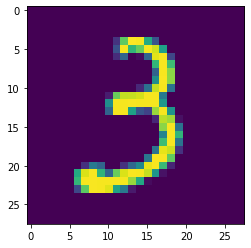

In [14]:
from matplotlib import pyplot as plt

plt.imshow(data[0][0].view(28, 28))
plt.show()

We can "clearly" see a 7!

The model will always try to make optimizations by decrease the loss. It will also try to be as simple and easy as possible. 

Because of this, we need to make sure our data is balanced. If 60% of our data was number 1, the model would adjust weights in a manner it would jump right away to predict a 1. Then, it would get stuck. This would be overfitting our NN. Once it gets stuck, it won't be able to dig itself out.

To avoid this, we have to make sure our data is balanced.

Let's see if Mnist is balanced.

In [15]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1

for i in counter_dict:
    print(f"{i}: {round(100*counter_dict[i]/total,2)}%")

0: 9.87%
1: 11.24%
2: 9.93%
3: 10.22%
4: 9.74%
5: 9.04%
6: 9.86%
7: 10.44%
8: 9.75%
9: 9.91%


## Building the model

Some things to take into consideration when using PyTorch, is that we are going to use OOP. This means we will be building classes for our NN.

In [110]:
import torch.nn as nn
import torch.nn.functional as F

In [48]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() # Inherit methods and attributes
        # Define the fully connected layers 
        self.fc1 = nn.Linear(784, 64) # Input = 784 because our images are 28*28; 
        self.fc2 = nn.Linear(64, 64) # Output = Target of 3 layers of 64 neurons for hidden layers.
        self.fc3 = nn.Linear(64, 64) # We could have done any other output.     
        self.fc4 = nn.Linear(64, 10) # Last output only has 10 neurons because we have 10 classes
        
    # Define path for data through the layers
    # Feed forward NN (Data goes forward, does not reverse)
    def forward(self, x):
        x = F.relu(self.fc1(x)) # Rectified linear function for activation.
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # Last layer we want a function that can fire only one neuron. We want a prob dist here.
        return F.log_softmax(x, dim = 1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [49]:
X = torch.rand((28,28))
X = X.view(-1, 28*28) # -1; unknown shape
net(X)

tensor([[-2.3184, -2.2770, -2.2262, -2.3206, -2.3031, -2.2491, -2.1601, -2.3999,
         -2.4112, -2.3899]], grad_fn=<LogSoftmaxBackward>)

Haven't initialized weights, first passes are not useful. 
grad_fn = gradient function; what number is it that we passed? 

## Training the Model

**Loss:** Measure of how wrong is the model. Our goal is to have a loss decrease. 

**Optimizer:** Adjust all the possible adjustable weights in such a way to lower the loss slowly over time (learning rate).

**Learning Rate:** We are trying to find the minimum of the function. If the rate is too big, we will always miss the minimum. If it is too slow, it might get stuck in a local minimum. We can use a decaying learning rate to avoid the mentioned problems.

**Epochs:** How many passes we do through our entire dataset.

In [19]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

In [20]:
for epoch in range(EPOCHS):
    for data in trainset: # data is a batch of features and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28)) 
        loss = F.nll_loss(output, y) # Loss metrics; in this case it works because our target is a scalar value.
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.7349, grad_fn=<NllLossBackward>)
tensor(0.0260, grad_fn=<NllLossBackward>)
tensor(0.3190, grad_fn=<NllLossBackward>)


How correct are we?

In [21]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
        
print("Training Accuracy:", round(correct/total,3))

Training Accuracy: 0.978


In [22]:
# Do the last chunk on the test set

correct = 0
total = 0
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
        
print("Testing Accuracy:", round(correct/total,3))

Testing Accuracy: 0.969


For most real tasks, this accuracy is... a red flag.

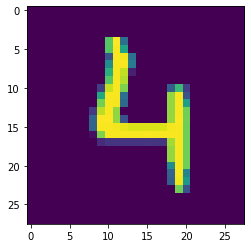

In [23]:
plt.imshow(X[1].view((28,28)))
plt.show()

In [24]:
print(torch.argmax(net(X[1].view(-1,28*28))))

tensor(4)


## Convolutional Neural Networks

With CNNs, we can pass 2D or 3D objects to our neural network without flattening it.

An image is a set of pixels. What a convolution will do, is search for features within a subset of these pixels through a window.

A 3x3 sized window, or 3x3 pixels convolution is a 3x3 kernel. This window will be slided through all the image and will get a scalar out of each "slide". It condeses the image (projection).

From this projection, we now get a (max)pooling, which is also like a window that selects the maximum value out of that window. This is drastically simplifying the image. We usually have 3 or 4 convolutional layers.

The first layer finds edges curves, simple things(combination of pixels). The second layer, says combinations of curves, edges and finds features out of those: circles, squares. The next one finds featurs of combinations of circles and squares... 



To further expand my knowledge on CNN, I will work with Microsoft's Cats and Dogs data set.

GOAL: Identify if an image has a cat or a dog.

In [134]:
import os
import numpy as np
import cv2 
#from tqdm import tqdm, tqdm_notebook
from tqdm.notebook import tqdm

### Preprocessing of the Data

Some images are landscape, while others are portrait. Furthermore, there are several sizes of images and they are coloured. We need to standardize our data.

We will switch the size of the images. Then, if we have a 30x50 image but we want all of them to be 50x50, we will resize.

In [135]:
REBUILD_DATA = False   # We already have the training data we needed.

class DogsVsCats():
    IMG_SIZE = 50
    CATS = "data/catsanddogsimg/PetImages/Cat"
    DOGS = "data/catsanddogsimg/PetImages/Dog"
    LABELS = {CATS:0, DOGS:1}
    training_data = []
    
    catcount = 0
    dogcount = 0

    TESTING = "PetImages/Testing"

    def make_training_data(self):
        for label in self.LABELS:
            # print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # Colour is not relevant in this case; colour does not add another dimension, it adds channels
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]]) # Hot-code vectors with np `eye`
                        
                        if label == self.CATS:
                            self.catcount += 1

                        elif label == self.DOGS:
                             self.dogcount += 1
                                
                    except Exception as e:
                        pass
                
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("CATS: ", self.catcount)
        print("DOGS: ", self.dogcount)
        
if REBUILD_DATA:
    dogsvcats = DogsVsCats()
    dogsvcats.make_training_data()

In [136]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [137]:
len(training_data)

24946

In [138]:
print(training_data[2])

[array([[ 17,  13,  15, ..., 115, 120, 115],
       [ 39,  31,  27, ..., 117, 121, 119],
       [ 33,  53,  61, ..., 120, 127, 118],
       ...,
       [ 18,  17,  14, ..., 127, 217, 216],
       [ 28,  29,  34, ..., 133, 220, 210],
       [140, 129, 140, ..., 212, 211, 209]], dtype=uint8)
 array([1., 0.])]


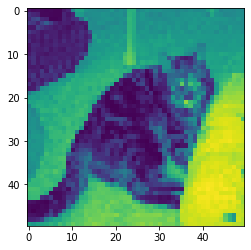

In [139]:
plt.imshow(training_data[2][0])
plt.show()

In [140]:
training_data[2][1]

array([1., 0.])

## Building the Model

In [186]:
class CNet(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        # Building the layers
        self.conv1 = nn.Conv2d(1, 32, 5) # 5x5 Kernel
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        # We need to flatten the information.
        # Pass data through a linear layer. 
        # What should be the input?
        # Let's create random data to see the shape of what we need. 
        # That way, we will know the right value to input in our fc1.

        x = torch.randn(50,50).view(-1, 1, 50, 50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) # flattening
        self.fc2 = nn.Linear(512, 2) # Target is two classes
        

    def convs(self, x):
        '''Fwd method for conv NN'''
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        
#         print(x[0].shape)
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim = 1) # Activation layer

In [187]:
net = CNet()
print(net)

CNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [188]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

# Separate training vs testing data
Val_pct = 0.1 # Testing size
val_size = int(len(X)*Val_pct)
print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size :]
test_y = y[-val_size :]

print(len(train_X), len(test_X))

2494
22452 2494


In [190]:
BATCH_SIZE = 100
EPOCHS = 1 

for epoch in range(EPOCHS):
    for i in tqdm(range(0,len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]
        
        net.zero_grad()
        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()
            
    print(f"Epoch: {epoch}. Loss: {loss}")


tensor(0.2397, grad_fn=<MseLossBackward>)


In [195]:
correct = 0
total = 0

with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]
        predicted_class = torch.argmax(net_out)
        if real_class == predicted_class:
            correct += 1
        total +=1
        
print(f"Accuracy:", round(100*(correct/total), 2), "%"))

TypeError: round() takes at most 2 arguments (3 given)